In [7]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize
from PIL import Image
import os
from sklearn.datasets import load_digits
import seaborn as sns
import umap.umap_ as umap

C:\Users\brand\AppData\Local\Temp\ipykernel_29952\2246918169.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((64, 64), Image.ANTIALIAS)
c:\Users\brand\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


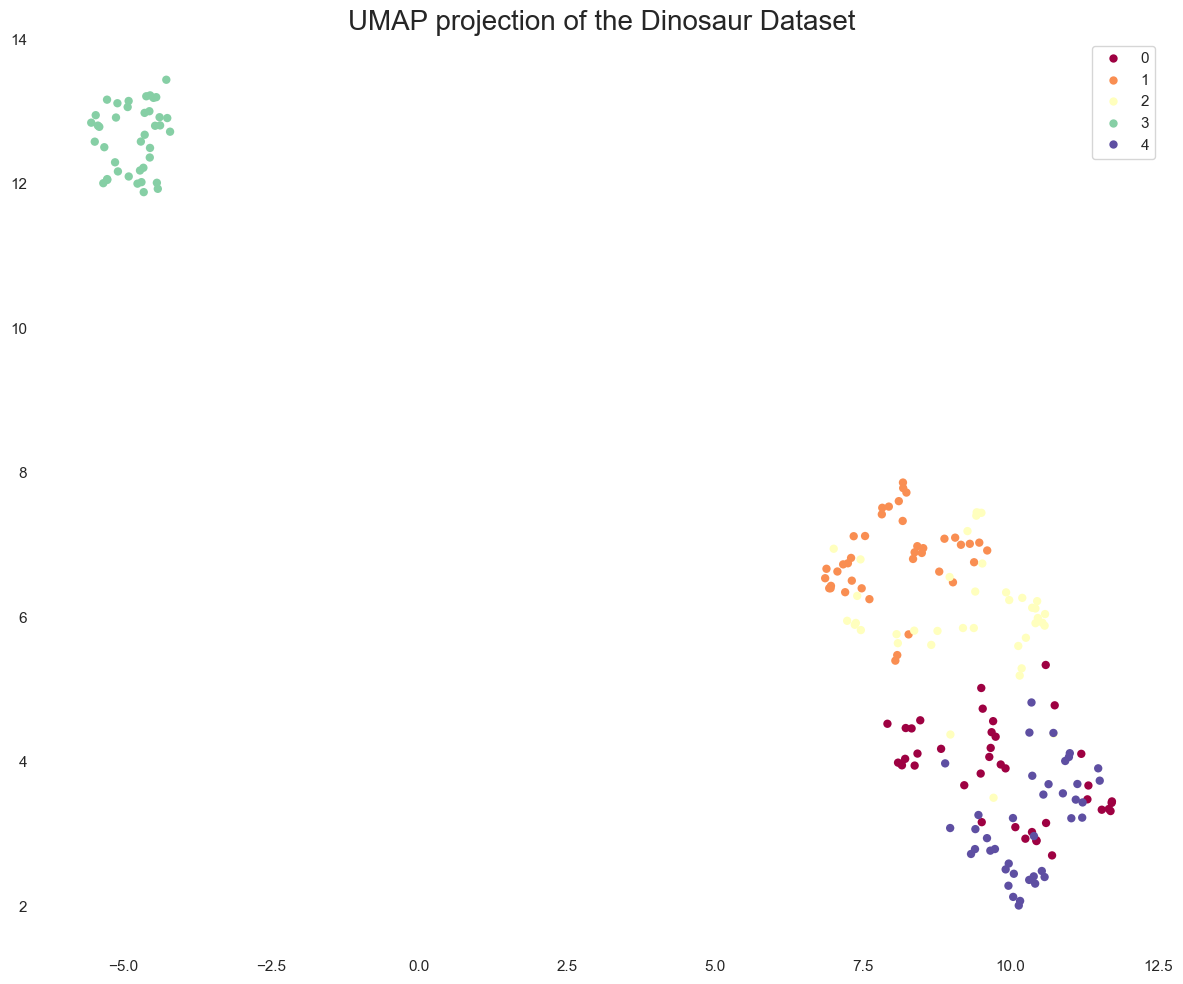

In [24]:

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            img = img.convert('L')
            img = img.resize((64, 64), Image.ANTIALIAS)
            img_array = np.array(img).flatten()
            images.append(img_array)
    return images

base_path = 'data/'
folders = ['ankylosaurus', 'brontosaurus', 'pterodactyl', 'trex', 'triceratops']


all_images = []
labels = []  
for i, folder in enumerate(folders):
    folder_path = os.path.join(base_path, folder)
    images = load_images_from_folder(folder_path)
    all_images.extend(images)
    labels.extend([i] * len(images)) 


image_array = np.array(all_images)


umap_result = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42).fit_transform(image_array)

sns.set_theme(style="white", context="notebook", rc={"figure.figsize": (12, 10)})

scatter = sns.scatterplot(
    x=umap_result[:, 0], 
    y=umap_result[:, 1], 
    hue=labels, 
    palette=sns.color_palette("Spectral", as_cmap=True),  
    legend='full',
    edgecolor='none'
)

sns.despine(left=True, bottom=True)


plt.title('UMAP projection of the Dinosaur Dataset', fontsize=20)

plt.tight_layout()
plt.show()



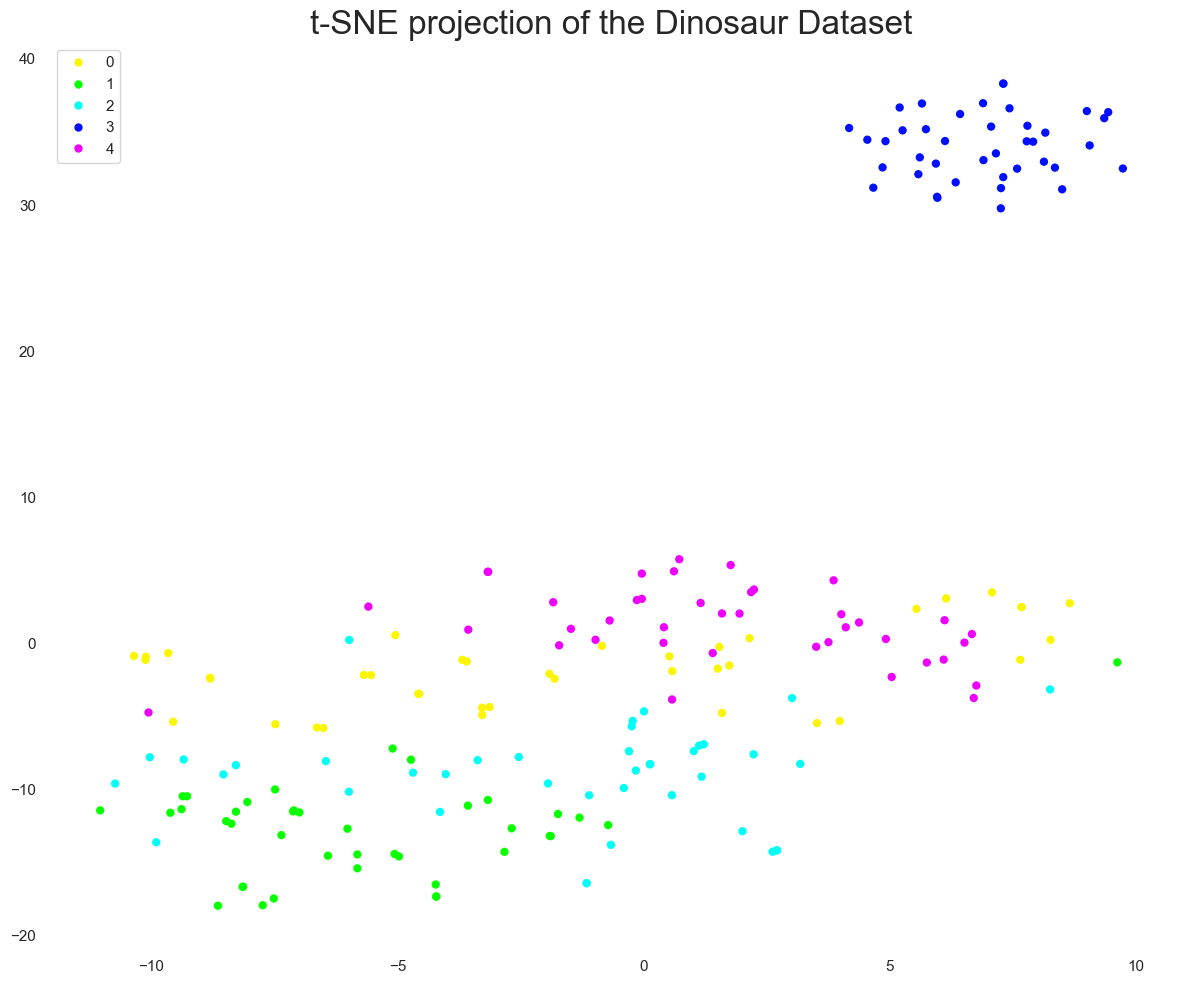

In [22]:
from sklearn.manifold import TSNE

tsne_result = TSNE(n_components=2, random_state=42).fit_transform(image_array)

sns.set_theme(style="white", palette="muted")

plt.figure(figsize=(12, 10))

scatter = sns.scatterplot(
    x=tsne_result[:, 0], 
    y=tsne_result[:, 1], 
    hue=labels, 
    palette=sns.color_palette("hsv", len(folders)),
    legend='full',
    edgecolor='none' 
)

sns.despine(left=True, bottom=True)

plt.title('t-SNE projection of the Dinosaur Dataset', fontsize=24)
plt.tight_layout()

plt.show()